In [10]:
from rmps_purity import *
from scipy.stats import linregress
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

np.set_printoptions(precision=3, threshold=np.inf, suppress=True)

In [2]:
def process_data(data, n_list, k_copies, batch_size=1000, ti=False): 
    num_samples = data.shape[1]
    num_batches = int(num_samples//batch_size)
    
    func = haar_purity if not ti else ti_purity
    h_purity = [func(n, k_copies, scaled=True) for n in n_list]

    err_mean = []
    err_std = []
    for i in range(len(data)):
        batches = [data[i,j*batch_size:(j+1)*batch_size] for j in range(num_batches)]
        purities = [samples_to_purity(batch, k_copies) for batch in batches]
        one_err = [np.sqrt(2**k_copies * (p-h_purity[i])) for p in purities]
        err_mean.append(np.mean(one_err))
        err_std.append(np.std(one_err))
    return err_mean, err_std

# Run Oct 12th

## Open $\chi = n$

In [3]:
with open("open_linear.pickle", "rb") as f: 
    data = pickle.load(f)

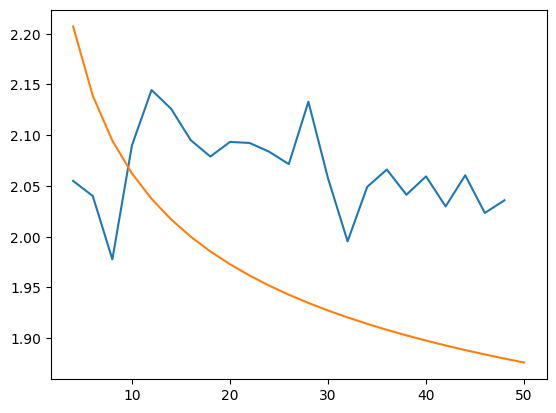

In [5]:
n_list = np.arange(4, 50+1, 2)
k_copies = 2
err_mean, _ = process_data(data, n_list, k_copies, batch_size=50000)
plt.plot(n_list[0:-1], err_mean)
plt.plot(n_list, 1.5+n_list**(-1/4))
#plt.ylim(0,2.5)

## Open $\chi\in [8,10,12,14,16,20,24,28,32]$ 

In [6]:
chi_list = [8,10,12,14,16,20,24,28,32]

data_array = []
for chi in chi_list:
    with open(f"open_{chi}.pickle", "rb") as f: 
        data_array.append(pickle.load(f))

In [8]:
err_mean_array = []
for chi,data in zip(chi_list, data_array): 
    n_list = [4+2*i for i in range(len(data))]
    err_mean, _ = process_data(data, n_list, k_copies, batch_size=len(data[0]))
    err_mean_array.append(err_mean)

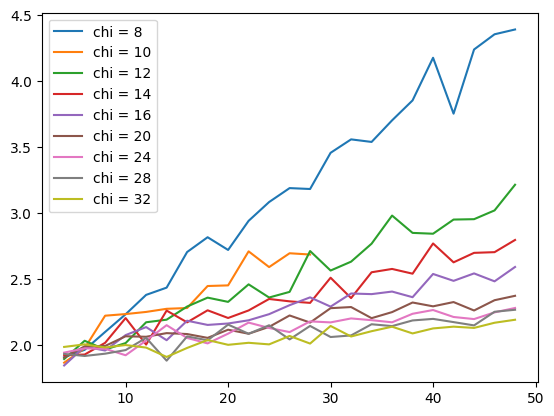

In [9]:
for chi, err_mean in zip(chi_list, err_mean_array):
    n_list = [4+2*i for i in range(len(err_mean))]
    plt.plot(n_list, err_mean, label=f'chi = {chi}')
    
plt.legend()

In [11]:
slope_list = []
intercept_list = []
for err_mean in err_mean_array:
    n_list = [4+2*i for i in range(len(err_mean))]
    result = linregress(n_list, err_mean)
    slope_list.append(result.slope)
    intercept_list.append(result.intercept)
    print(f'1-r = {1-result.rvalue}')

1-r = 0.008399020073216357
1-r = 0.042750395985020395
1-r = 0.019821815831335465
1-r = 0.036438458477271896
1-r = 0.029028806931109652
1-r = 0.04583324561412949
1-r = 0.0854904297829806
1-r = 0.12298901396298911
1-r = 0.11633863255997756


Text(0.5, 0, '$\\chi$')

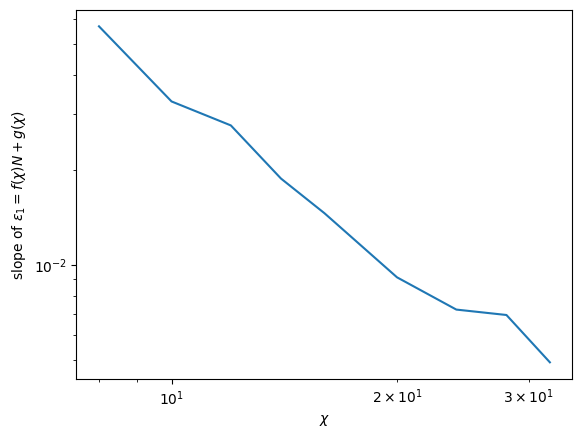

In [12]:
plt.plot(chi_list, slope_list) 
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'slope of $\epsilon_1=f(\chi)N + g(\chi)$')
plt.xlabel(r'$\chi$')

Text(0.5, 0, '$\\chi$')

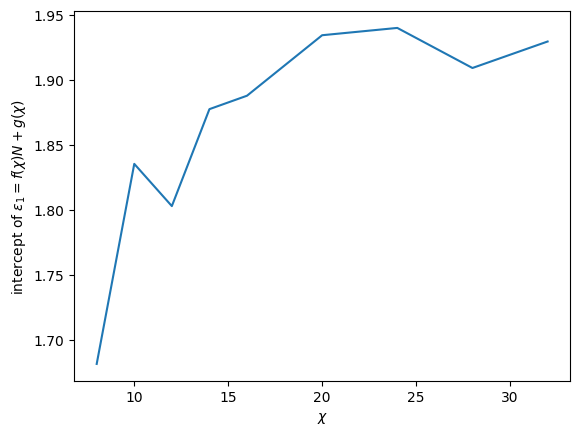

In [13]:
plt.plot(chi_list, intercept_list) 
#plt.yscale('log')
#plt.xscale('log')
plt.ylabel(r'intercept of $\epsilon_1=f(\chi)N+g(\chi)$')
plt.xlabel(r'$\chi$')

## TI $\chi=n$

In [14]:
with open("ti_linear.pickle", "rb") as f: 
    data = pickle.load(f)

In [16]:
n_list = np.arange(4, 30+1, 2)
k_copies = 2
err_mean, _, _ = process_data(data, n_list, k_copies, batch_size=50000, ti=True)
plt.plot(n_list[0:-1], err_mean)
plt.plot(n_list, 1.5+n_list**(-1/4))

NotImplementedError: call Shivan

# Run Oct 15th

## Periodic $\chi\in [8,10,12,14,16,20,24,28,32]$ 

## TI $\chi\in [8,10,12,14,16,20,24,28,32]$ 